In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from aux_function_SR import read_data, get_eq_filtered, SR_SENSORS
import pandas as pd
import numpy as np
from neuralprophet import NeuralProphet, set_log_level, save, load
import logging
import pandas as pd
from datetime import datetime, timedelta
import pickle
from NPw import NPw, ConfigEQ, ConfigNPw, ConfigForecast
from dataclasses import dataclass, asdict
from dateutil.relativedelta import *
import ast

import sys

set_log_level("ERROR")

delta = timedelta(minutes=30)
# Read SR and EQ data
df_SR = read_data("NPdata.mat")
arrays = (
    pd.DataFrame(df_SR["NS_mean"])
    .applymap(lambda x: np.array(x, dtype=np.float32))
    .to_numpy()
)
# Adatpt to NeuralProphet input data
NS_mean = np.array(np.stack([np.stack(a[0].squeeze()) for a in arrays]))
# Create datetime Array
pd.date_range(start="2018-09-09", end="2020-02-02")
ds = pd.date_range(start="2016-01-01", end="2021-01-01", freq="30min")
# Create the prior dataframe
df_regressor = pd.DataFrame(
    {
        "ds": ds,
        "S0": NS_mean[:, 0],
        "S1": NS_mean[:, 1],
        "S2": NS_mean[:, 2],
        "S3": NS_mean[:, 3],
        "S4": NS_mean[:, 4],
        "S5": NS_mean[:, 5],
        "S6": NS_mean[:, 6],
        "S7": NS_mean[:, 7],
        "S8": NS_mean[:, 8],
        "S9": NS_mean[:, 9],
    }
)

config_npw_d = {
    "forecast_length": timedelta(hours=24),
    "freq": timedelta(minutes=30),
    "question_mark_length": timedelta(hours=24),
    "num_hidden_layers": 2,
    "learning_rate": 0.01,
    "n_lags": 5 * 48,
    "d_hidden": 16,
    "verbose": True,
    "epochs": None,
    "gpu": False,
    "binary_event": False,
}
config_npw = ConfigNPw(**config_npw_d)

ConfigEQ_d = {
    "dist_start": 20000,
    "dist_delta": 20000,
    "dist_max": 20000,
    "mag_start": 0.5,
    "mag_delta": 0.5,
}
df_events = df_SR.loc[:, ["mag", "dist", "lat", "arc"]]
config_events = ConfigEQ(**ConfigEQ_d)
config_path = "config_001.json"
(config_npw, config_events) = NPw.load_config(config_path)

In [5]:
hours_offsets = [0]
event_offsets = [None, -timedelta(hours=24)]
index = 1

start_day = datetime.fromisoformat("2017-01-01T10:00:00")

start_date = start_day + index * relativedelta(months=+1)
NPw_o = NPw(config_npw, df_regressor, config_events, df_events)

# test_metrics = NPw_o.predict_with_offset_hours(start_date, hours_offsets, event_offsets)

In [257]:
config_fc = ConfigForecast(start_forecast=start_date, offset_event=None)
test_metrics = NPw_o.add_forecast(config_fc)

NameError: name 'start_date' is not defined

In [7]:
test_metrics

{'RMSE': 0.6371732, 'MSE': 0.4624304, 'MAE': 0.4515507}

In [15]:
config_fc = ConfigForecast(start_forecast=start_date, offset_event=None)
test_metrics = NPw_o.predict_with_offset_hours(start_date, hours_offsets, event_offsets)

Training: 0it [00:00, ?it/s]

Predicting: 1468it [00:00, ?it/s]

Predicting: 1468it [00:00, ?it/s]

Predicting: 1468it [00:00, ?it/s]

Predicting: 1468it [00:00, ?it/s]

Predicting: 1468it [00:00, ?it/s]

Predicting: 1468it [00:00, ?it/s]

Predicting: 1468it [00:00, ?it/s]

Predicting: 1468it [00:00, ?it/s]

Predicting: 1468it [00:00, ?it/s]

Predicting: 1468it [00:00, ?it/s]

MSE: 0.4649489
2017-02-01 10:00:00 None {'RMSE': 0.6408529, 'MSE': 0.4649489, 'MAE': 0.45420492}


Training: 0it [00:00, ?it/s]

Predicting: 1468it [00:00, ?it/s]

Predicting: 1468it [00:00, ?it/s]

Predicting: 1468it [00:00, ?it/s]

Predicting: 1468it [00:00, ?it/s]

Predicting: 1468it [00:00, ?it/s]

Predicting: 1468it [00:00, ?it/s]

Predicting: 1468it [00:00, ?it/s]

Predicting: 1468it [00:00, ?it/s]

Predicting: 1468it [00:00, ?it/s]

Predicting: 1468it [00:00, ?it/s]

MSE: 0.45217252
2017-02-01 10:00:00 -1 day, 0:00:00 {'RMSE': 0.6276447, 'MSE': 0.45217252, 'MAE': 0.4432974}


In [13]:
df_with_events

{'RMSE': 0.6316238, 'MSE': 0.4554542, 'MAE': 0.44503132}

In [6]:
current_date = dates.iloc[0]

current = df_with_event.set_index("ds")
for current_date, current_mag in zip(dates, mag):
    current.loc[current_date, "EV"] = current_mag

df_with_event = current.reset_index()
print(current)
print(np.sum(df_with_event["EV"] > 5.0))
# df_with_event["EV"] = current["EV"]

# current.loc[("2016-01-10 17:30:00"),"EV"] = 2.3
# print(current_date)
# print(df_with_event["ds"][467] == current_date )
# print(current.loc[("2016-01-10 17:30:00")])

                            y  ID   EV
ds                                    
2016-01-01 00:00:00  0.001975  S0  0.0
2016-01-01 00:30:00  0.013471  S0  0.0
2016-01-01 01:00:00 -0.000497  S0  0.0
2016-01-01 01:30:00  0.000228  S0  0.0
2016-01-01 02:00:00  0.035756  S0  0.0
...                       ...  ..  ...
2017-02-02 07:30:00 -0.165935  S9  0.0
2017-02-02 08:00:00  0.669628  S9  0.0
2017-02-02 08:30:00  0.627886  S9  0.0
2017-02-02 09:00:00  0.377886  S9  0.0
2017-02-02 09:30:00  0.846133  S9  0.0

[191240 rows x 3 columns]
610


In [233]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from aux_function_SR import read_data, get_eq_filtered, SR_SENSORS
import pandas as pd
import numpy as np
from neuralprophet import NeuralProphet, set_log_level, save, load
import logging
import pandas as pd
from datetime import datetime, timedelta
from NPw import NPw, ConfigEQ, ConfigNPw, ConfigForecast
from dateutil.relativedelta import *

import sys

set_log_level("ERROR")

delta = timedelta(minutes=30)
# Read SR and EQ data
df_SR = read_data("NPdata.mat")
arrays = (
    pd.DataFrame(df_SR["NS_mean"])
    .applymap(lambda x: np.array(x, dtype=np.float32))
    .to_numpy()
)
# Adatpt to NeuralProphet input data
NS_mean = np.array(np.stack([np.stack(a[0].squeeze()) for a in arrays]))
# Create datetime Array
pd.date_range(start="2018-09-09", end="2020-02-02")
ds = pd.date_range(start="2016-01-01", end="2021-01-01", freq="30min")
# Create the prior dataframe
df_regressor = pd.DataFrame(
    {
        "ds": ds,
        "S0": NS_mean[:, 0],
        "S1": NS_mean[:, 1],
        "S2": NS_mean[:, 2],
        "S3": NS_mean[:, 3],
        "S4": NS_mean[:, 4],
        "S5": NS_mean[:, 5],
        "S6": NS_mean[:, 6],
        "S7": NS_mean[:, 7],
        "S8": NS_mean[:, 8],
        "S9": NS_mean[:, 9],
    }
)
config_path = "config_001.json"
(config_npw, config_events) = NPw.load_config(config_path)

hours_offsets = [-3 * 24, 12, 24]
event_offsets = [None, -timedelta(hours=12), -timedelta(hours=24)]
df_events = df_SR.loc[:, ["mag", "dist", "lat", "arc"]]
NPw_o = NPw(
    config_npw, df_regressor, config_events, df_SR.loc[:, ["mag", "dist", "lat", "arc"]]
)
NPw_o.get_df_from_folder("../Result/with_values_event")


NPw_o_server = NPw(config_npw, df_regressor, config_events, df_events)
NPw_o_server.get_df_from_folder("../Result/server")
NPw_test = NPw(config_npw, df_regressor, config_events, df_events)
NPw_test.get_df_from_folder("../Result/daily_5_test")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [234]:
df_SR.loc[:, ["mag", "dist", "lat", "arc"]]
print(df_SR.loc[:, ["mag", "dist", "lat", "arc"]])

       mag          dist      lat         arc
0      NaN           NaN      NaN         NaN
1      NaN           NaN      NaN         NaN
2      NaN           NaN      NaN         NaN
3      NaN           NaN      NaN         NaN
4      6.3  16666.299474 -50.5575  257.902506
...    ...           ...      ...         ...
87692  NaN           NaN      NaN         NaN
87693  NaN           NaN      NaN         NaN
87694  NaN           NaN      NaN         NaN
87695  NaN           NaN      NaN         NaN
87696  NaN           NaN      NaN         NaN

[87697 rows x 4 columns]


In [235]:
df_pre = NPw_o.pre_binary_perform_fast("MSE")
df_test = NPw_test.pre_binary_perform_fast("MSE")
print(np.sum(df_test))

WARNING - (py.warnings._showwarnmsg) - C:\Users\Asus Rog\anaconda3\envs\NeuralProphet\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return reduction(axis=axis, out=out, **passkwargs)



predicted_class    14
dtype: int64


In [236]:
df = NPw_o.get_binary_perform_fast(df_pre, 24, 0, config_events)
df

[array([0.69230769, 0.5       , 0.44444444]),
 array([[18,  8],
        [ 8,  8]], dtype=int64)]

In [237]:
df_out = NPw_o_server.get_binary_results("MSE", 24, 0, config_events)
NPw.print_df(df_out.head())

,ref,best_class,actual_class,predicted_class,type,diff_metrics,n_classes,event_MSE_0,event_MSE_1,dates,dist,mag,arc,dif_event
date,,,,,,,,,,,,,,
2017-01-03 02:30:00,72.0,2,1,1,TP,0.000000,3,-0.206315,-0.329749,2017-01-02 21:00:00,12.491250,5.2,0.803242,-6.0
2017-01-06 14:30:00,-12.0,2,0,1,FP,0.002433,3,-0.002433,-0.062892,2017-01-06 15:30:00,9.056377,5.3,0.639927,1.0
2017-01-07 02:30:00,-24.0,0,0,0,TN,0.000000,3,0.009468,0.078812,2017-01-07 03:00:00,9.055946,5.4,0.639280,0.0
2017-02-02 13:30:00,-61.0,1,0,1,FP,0.005737,3,-0.005737,0.099728,2017-02-03 00:30:00,10.431630,5.4,0.738548,11.0
2017-02-06 01:30:00,2.0,2,0,1,FP,0.006310,3,0.006310,-0.272433,2017-02-06 03:30:00,2.510291,5.3,0.998784,2.0


In [238]:
import pygad

In [239]:
weight_outputs = np.array([1, 1, 2])
desired_output = 2.5

In [240]:
range_dist_start = list(range(100, 10000, 100))
range_dist_delta = list(range(100, 10000, 100))
range_dist_max = list(range(8000, 14000, 100))
mag_start = list(np.linspace(0.1, 8, 100))
mag_delta = list(np.linspace(0.1, 2, 100))
arc_max = list(range(30, 90, 15))

In [251]:
df_pre = NPw_o.pre_binary_perform_fast("MSE")

df_test = NPw_test.pre_binary_perform_fast("MSE")
df_ga = df_pre


def get_config_from_solution(solution):
    ConfigEQ_d = {
        "dist_start": solution[1],  # 4000
        "dist_delta": solution[2],  # 2000
        "dist_max": solution[3],  # 7000
        "lat_max": 360,
        "arc_max": solution[6],
        "mag_start": solution[4],
        "mag_delta": solution[5],
        "dist_perct": 1000,
    }
    config_events = ConfigEQ(**ConfigEQ_d)
    return config_events


def fitness_func(solution, solution_idx):
    config_events = get_config_from_solution(solution)
    [output, cm] = NPw_o.get_binary_perform_fast(
        df_ga, np.abs(np.round(solution[0])).astype(int), 0, config_events
    )

    fitness = 1.0 / np.abs(np.sum(output * weight_outputs) - desired_output)
    return fitness

In [246]:
num_generations = 50
num_parents_mating = 10

sol_per_pop = 100
gene_space = [
    [24],
    range_dist_start,
    range_dist_delta,
    range_dist_max,
    mag_start,
    mag_delta,
    arc_max,
]
num_genes = len(gene_space)

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "two_points"

mutation_type = "random"
mutation_percent_genes = 0.2

In [248]:
ga_instance = pygad.GA(
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_func,
    sol_per_pop=sol_per_pop,
    gene_space=gene_space,
    num_genes=num_genes,
    init_range_low=init_range_low,
    init_range_high=init_range_high,
    parent_selection_type=parent_selection_type,
    keep_parents=keep_parents,
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    mutation_percent_genes=mutation_percent_genes,
)

WARNING - (py.warnings._showwarnmsg) - C:\Users\Asus Rog\anaconda3\envs\NeuralProphet\lib\site-packages\pygad\pygad.py:503: UserWarning: The percentage of genes to mutate (mutation_percent_genes=0.2) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))



In [ ]:
ga_instance.run()

In [252]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print(
    "Fitness value of the best solution = {solution_fitness}".format(
        solution_fitness=solution_fitness
    )
)

4.29473684210527
2.44956772334294
0.6419390378259273
0.6419390378259273
1.010810810810811
4.29473684210527
4.29473684210527
0.5316455696202532
4.29473684210527
1.010810810810811
4.29473684210527
0.60431654676259
0.5316455696202532
4.29473684210527
4.29473684210527
1.3125
4.29473684210527
2.44956772334294
4.29473684210527
1.0827168796234028
4.29473684210527
4.29473684210527
4.29473684210527
4.29473684210527
1.010810810810811
4.29473684210527
1.7106109324758838
4.29473684210527
1.6981132075471694
4.29473684210527
4.29473684210527
0.9071053552677634
4.29473684210527
1.3125
4.29473684210527
4.29473684210527
2.44956772334294
0.6419390378259273
4.29473684210527
2.44956772334294
0.5205479452054794
4.29473684210527
4.29473684210527
4.29473684210527
4.29473684210527
1.7106109324758838
4.29473684210527
4.29473684210527
4.29473684210527
4.29473684210527
2.44956772334294
0.5316455696202532
4.29473684210527
4.29473684210527
4.29473684210527
4.29473684210527
4.29473684210527
2.44956772334294
4.29473

In [253]:
df_ga = df_pre
config_events = get_config_from_solution(solution)
output, cm = NPw_o.get_binary_perform_fast(
    df_ga, np.abs(np.round(solution[0])).astype(int), 0, config_events
)
print(output)
print(cm)
# fitness_func(solution,51)

[0.70833333 0.5        0.52941176]
[[17  7]
 [ 9  9]]


In [254]:
df_ga = df_test
config_events = get_config_from_solution(solution)
output, cm = NPw_o.get_binary_perform_fast(
    df_ga, np.abs(np.round(solution[0])).astype(int), 0, config_events
)
print(output)
print(cm)
# fitness_func(solution,52)

[0.41666667 0.58333333 1.4       ]
[[5 7]
 [5 7]]


In [ ]:
ga_instance.plot_fitness()

### EXPLORATORY ANALYSIS


## CLassifier with 

In [279]:
import dalex as dx

import pandas as pd
import numpy as np

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import warnings

warnings.filterwarnings("ignore")
data = NPw_o.get_binary_results("MSE", np.abs(np.round(solution[0])).astype(int), 0)
# data =  NPw_o_server.get_binary_results("MSE",np.abs(np.round(solution[0])).astype(int), 0)
event_in_range = [int(int(a) in range(-24, 0)) for a in data["dif_event"]]
X_class = data.loc[
    :, ["dist", "mag", "arc", "dif_event"]
]  # .drop(columns=["ref",  "actual_class", "predicted_class", "n_classes", "dates", "type"])

y_class = data["predicted_class"].astype(int) == data["actual_class"].astype(int)
X_class["dif_event"] = X_class["dif_event"].astype(int)

In [280]:
numerical_features = "dist", "mag", "arc", "dif_event"
numerical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median", fill_value=0)),
        ("scaler", StandardScaler()),
    ]
)
categorical_features = ["event_in_range"]
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value=0)),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        # ('cat', categorical_transformer, categorical_features)
    ]
)
classifier = MLPClassifier(
    hidden_layer_sizes=(150, 100, 50), max_iter=500, random_state=0
)
clf = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", classifier)])

In [288]:
clf.fit(X_class, y_class)
exp = dx.Explainer(clf, X_class, y_class)
vi = exp.model_parts()
pdp_num = exp.model_profile(type="partial", label="pdp")
ale_num = exp.model_profile(type="accumulated", label="ale")

Preparation of a new explainer is initiated

  -> data              : 42 rows 4 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 42 values
  -> model_class       : sklearn.neural_network._multilayer_perceptron.MLPClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x0000018E6648ED30> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 1.33e-06, mean = 0.619, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.0219, mean = -6.28e-05, max = 0.0384
  -> model_info        : package sklearn

A new explainer has been created!


Calculating accumulated dependency: 100%|████████████████████████████████████████████████| 4/4 [00:00<00:00, 28.49it/s]


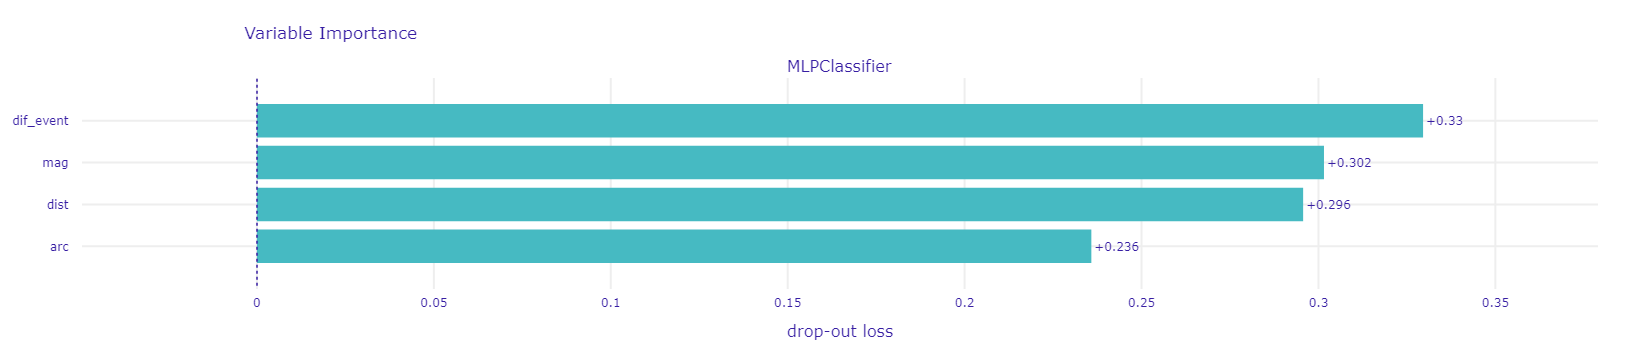

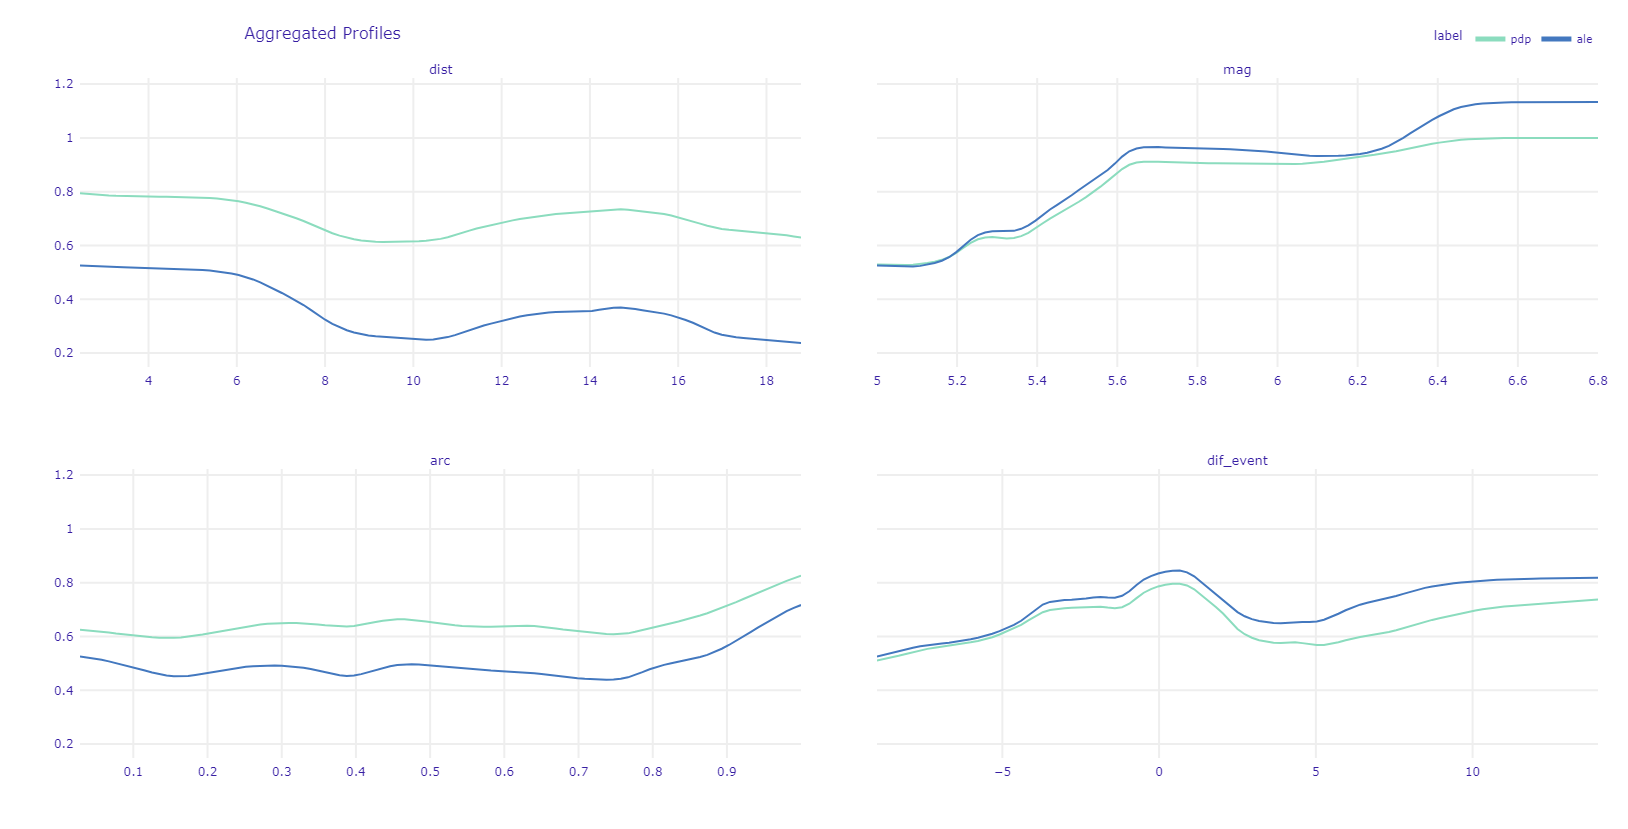

In [289]:
vi.plot(max_vars=5)
pdp_num.plot(ale_num)

## exp = dx.Explainer(clf, X_class, y_class)
vi = exp.model_parts()
pdp_num = exp.model_profile(type = 'partial', label="pdp")
ale_num = exp.model_profile(type = 'accumulated', label="ale")Clasifier with Correct prediction

In [302]:
import dalex as dx

import pandas as pd
import numpy as np

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import warnings

warnings.filterwarnings("ignore")
data = NPw_o.get_binary_results("MSE", np.abs(np.round(solution[0])).astype(int), 0)
# data =  NPw_o_server.get_binary_results("MSE",np.abs(np.round(solution[0])).astype(int), 0)

X_class = data.loc[
    :, ["dist", "mag", "arc", "dif_event"]
]  # .drop(columns=["ref",  "actual_class", "predicted_class", "n_classes", "dates", "type"])

y_class = data["predicted_class"].astype(int)
X_class["dif_event"] = X_class["dif_event"].astype(int)

In [303]:
numerical_features = "dist", "mag", "arc", "dif_event"
numerical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median", fill_value=0)),
        ("scaler", StandardScaler()),
    ]
)
categorical_features = ["event_in_range"]
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value=0)),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        # ('cat', categorical_transformer, categorical_features)
    ]
)
classifier = MLPClassifier(
    hidden_layer_sizes=(150, 100, 50), max_iter=500, random_state=0
)
clf = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", classifier)])

In [304]:
clf.fit(X_class, y_class)
exp = dx.Explainer(clf, X_class, y_class)
vi = exp.model_parts()
pdp_num = exp.model_profile(type="partial", label="pdp")
ale_num = exp.model_profile(type="accumulated", label="ale")

Preparation of a new explainer is initiated

  -> data              : 42 rows 4 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 42 values
  -> model_class       : sklearn.neural_network._multilayer_perceptron.MLPClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x0000018E6648ED30> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 7.83e-26, mean = 0.381, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.0295, mean = 7.8e-05, max = 0.0182
  -> model_info        : package sklearn

A new explainer has been created!


Calculating accumulated dependency: 100%|████████████████████████████████████████████████| 4/4 [00:00<00:00, 28.15it/s]


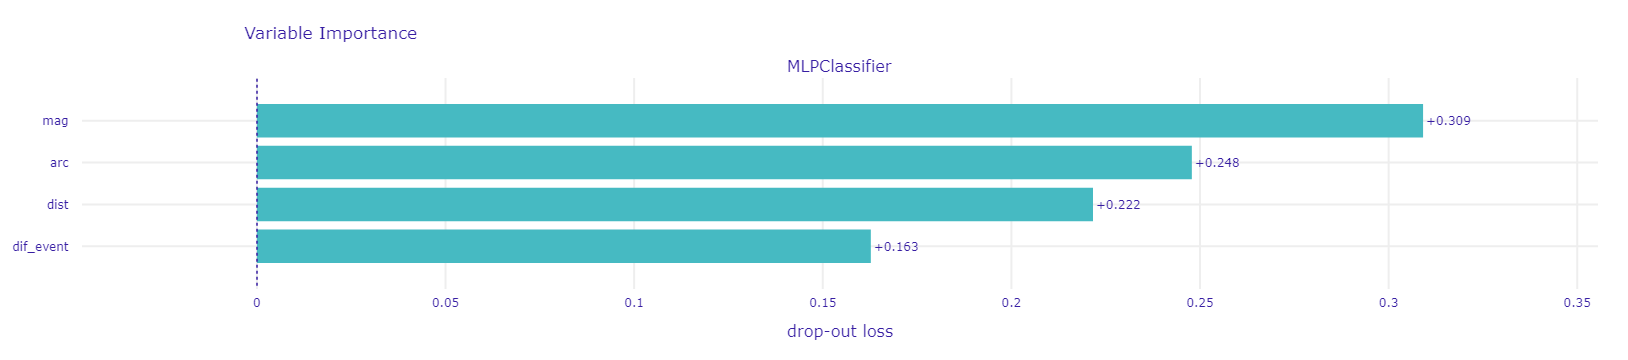

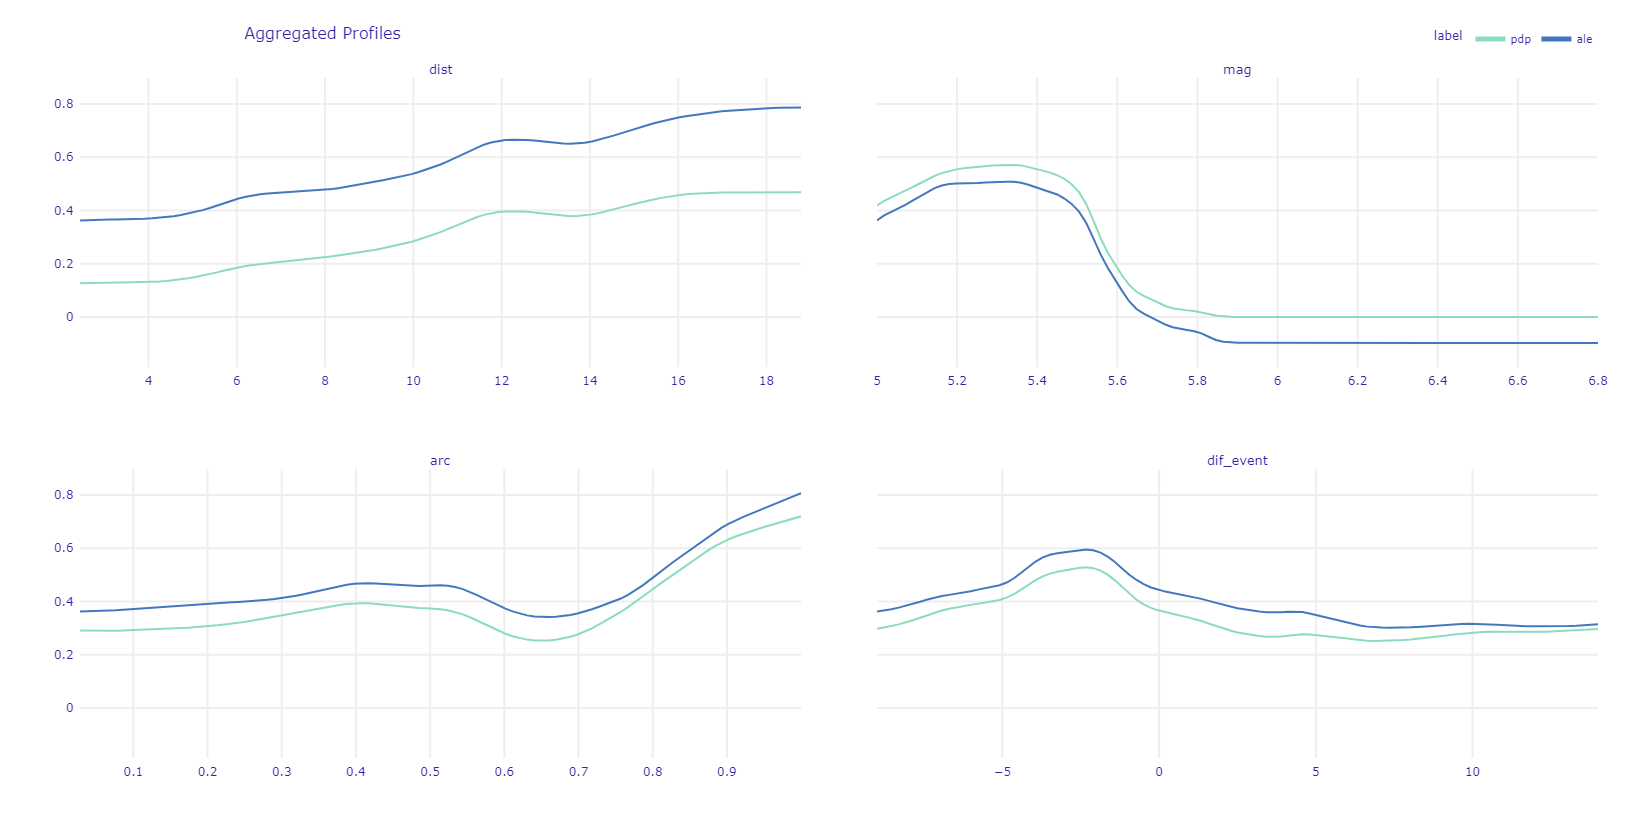

In [305]:
vi.plot(max_vars=5)
pdp_num.plot(ale_num)

In [308]:
from sklearn.ensemble import GradientBoostingRegressor

warnings.filterwarnings("ignore")
data = NPw_o.get_binary_results("MSE", np.abs(np.round(solution[0])).astype(int), 0)
event_in_range = [int(int(a) in range(-24, 0)) for a in data["dif_event"]]
data["event_in_range"] = event_in_range
X_reg = data.loc[:, ["dist", "mag", "arc", "dif_event"]]
print(X_reg.columns)
y_reg = np.array(data["diff_metrics"])


numerical_features = "dist", "mag", "arc", "dif_event"
numerical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median", fill_value=0)),
        ("scaler", StandardScaler()),
    ]
)
categorical_features = ["event_in_range"]
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value=0)),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        # ('cat', categorical_transformer, categorical_features)
    ]
)
model = GradientBoostingRegressor()
reg = Pipeline(steps=[("preprocessor", preprocessor), ("regression", model)])


X_reg["dif_event"] = X_reg["dif_event"].astype(int)

Index(['dist', 'mag', 'arc', 'dif_event'], dtype='object')


In [309]:
reg.fit(X_reg, y_reg)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ('dist', 'mag', 'arc',
                                                   'dif_event'))])),
                ('regression', GradientBoostingRegressor())])

Preparation of a new explainer is initiated

  -> data              : 42 rows 4 cols
  -> target variable   : 42 values
  -> model_class       : sklearn.ensemble._gb.GradientBoostingRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x0000018E6648EC10> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = -0.000988, mean = 0.0168, max = 0.124
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.00309, mean = -1.03e-18, max = 0.00432
  -> model_info        : package sklearn

A new explainer has been created!


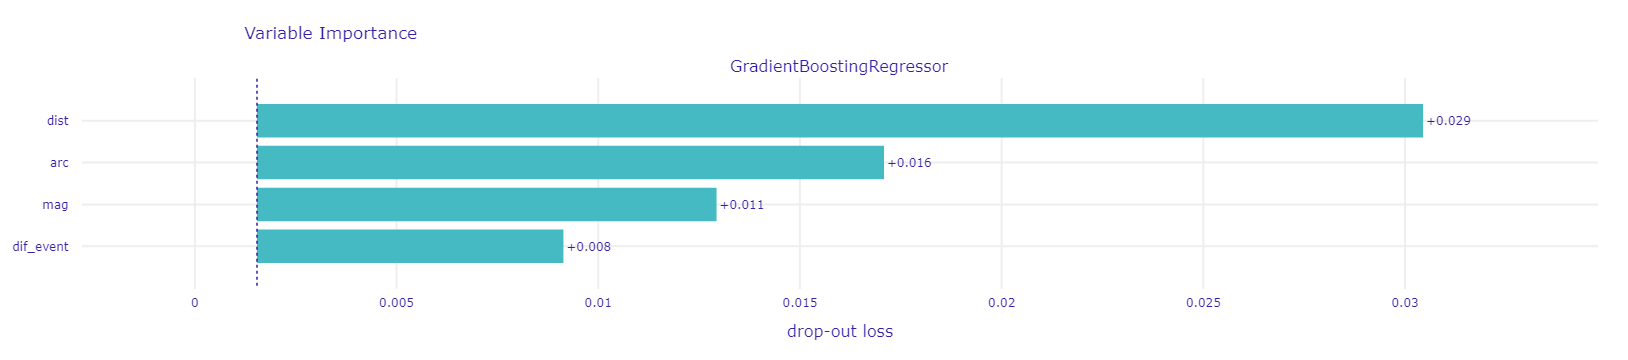

In [310]:
exp_reg = dx.Explainer(reg, X_reg, y_reg)
vi = exp_reg.model_parts()
vi.result
vi.plot(max_vars=10)

Calculating accumulated dependency: 100%|████████████████████████████████████████████████| 4/4 [00:00<00:00, 25.65it/s]


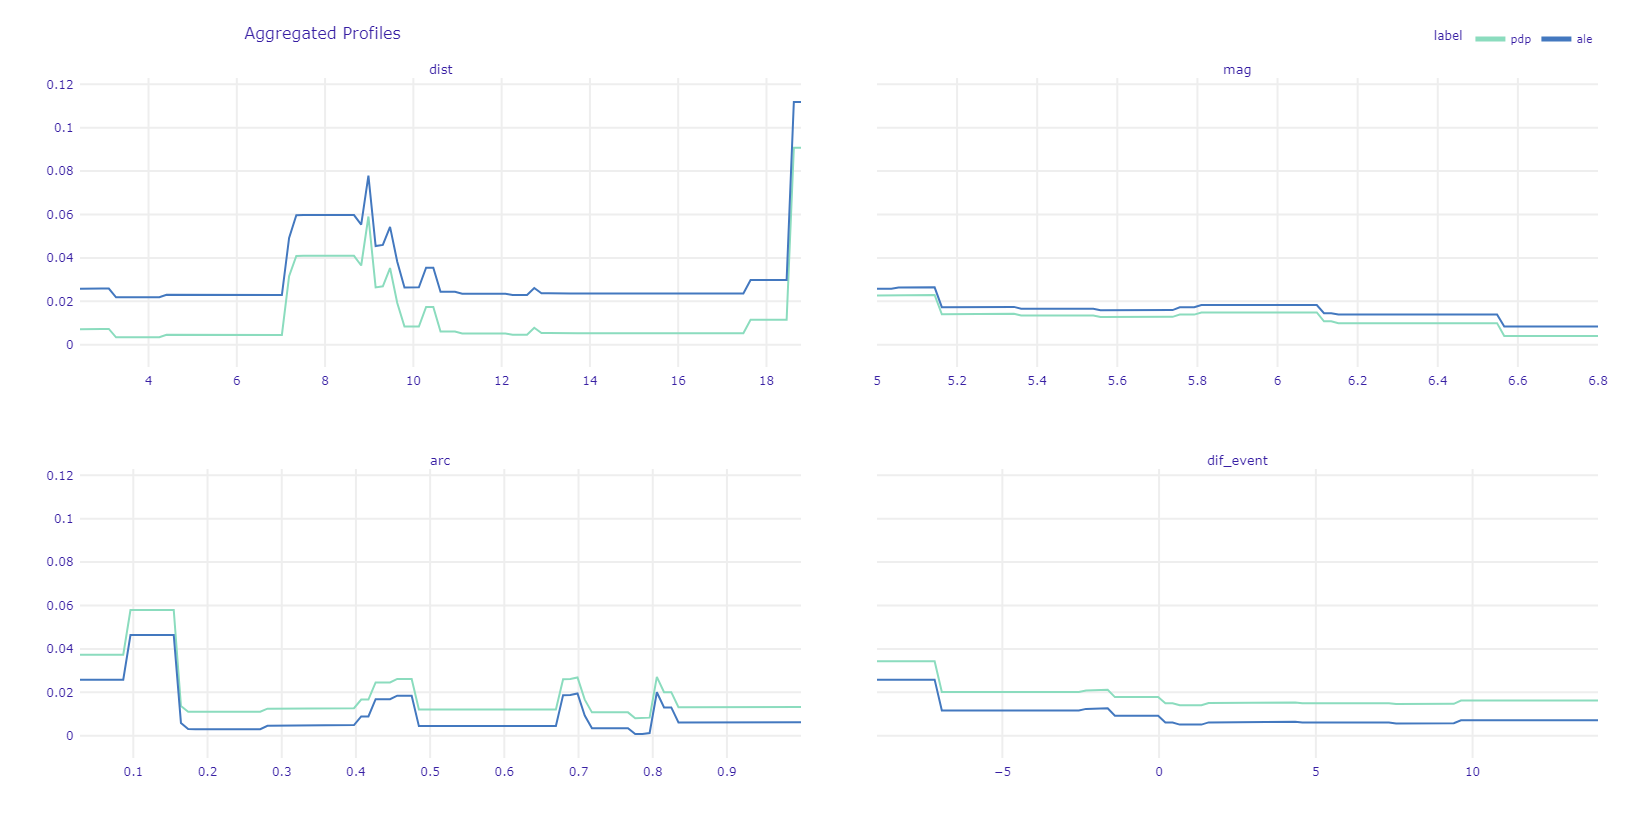

In [311]:
pdp_num = exp_reg.model_profile(type="partial", label="pdp")
ale_num = exp_reg.model_profile(type="accumulated", label="ale")
pdp_num.plot(ale_num)